<a href="https://colab.research.google.com/github/faiyaz0987/Deel/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000,)


In [3]:

X_train = X_train.reshape(60000,28,28,1).astype('float32')
y_train = to_categorical(y_train, num_classes=10)
X_test = X_test.reshape(10000,28,28,1).astype('float32')
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train/255
X_test = X_test/255
y_test.shape
number_classes = 10

In [4]:
model_cnn = Sequential()
model_cnn.add(Input(shape=(28,28,1)))
model_cnn.add(Conv2D(32,(5,5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(5,5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1024,activation='relu'))
model_cnn.add(Dense(number_classes,activation='softmax'))

In [5]:
learning_rate = 0.01
optimiser = Adam(learning_rate=learning_rate)
model_cnn.compile(optimizer = optimiser, loss = "categorical_crossentropy", metrics = ['accuracy'])

In [6]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,111,946 (4.24 MB)

 Trainable params: 1,111,946 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model_cnn.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8149 - loss: 0.5921 - val_accuracy: 0.9590 - val_loss: 0.1299
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9567 - loss: 0.1445 - val_accuracy: 0.9581 - val_loss: 0.1670
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9640 - loss: 0.1261 - val_accuracy: 0.9672 - val_loss: 0.1076
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9667 - loss: 0.1178 - val_accuracy: 0.9622 - val_loss: 0.1379
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9683 - loss: 0.1100 - val_accuracy: 0.9616 - val_loss: 0.1528
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9679 - loss: 0.1170 - val_accuracy: 0.9666 - val_loss: 0.1222
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9684 - loss: 0.1209 - val_accuracy: 0.9669 - val_loss: 0.1202
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9691 - loss: 0.1162 -

In [11]:
loss, accuracy = model_cnn.evaluate(X_test,y_test,verbose=0)
print(loss)
print(accuracy)

0.14378075301647186
0.9696999788284302


In [19]:
import numpy as np
prediction = np.argmax(model_cnn.predict(X_test[:10]), axis = 1)
print(prediction)
print(np.argmax(y_test[:10], axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[7 2 1 0 4 1 4 2 5 9]
[7 2 1 0 4 1 4 9 5 9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


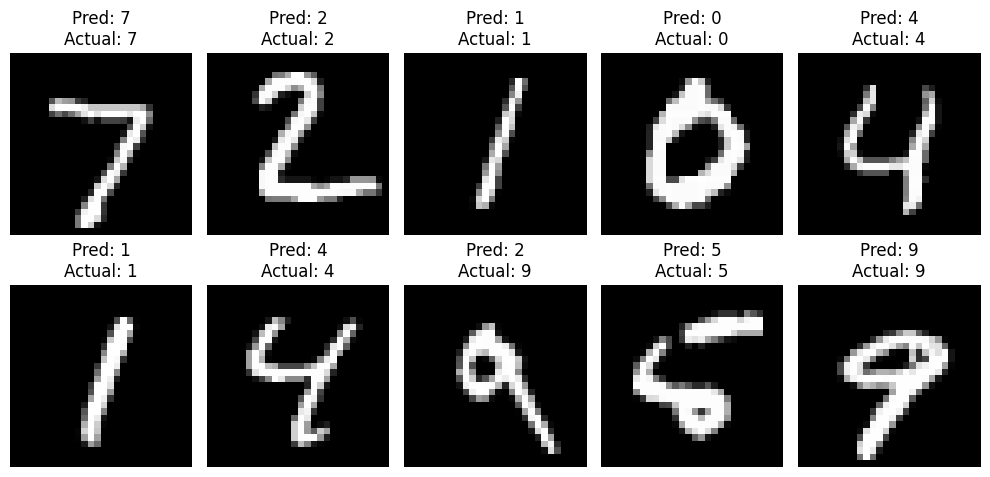

In [18]:
import numpy as np
import matplotlib.pyplot as plt

predictions = np.argmax(model_cnn.predict(X_test[:10]), axis=1)
actual_labels = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()